# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | meulaboh
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | halifax
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | uarini
Processing Record 8 of Set 1 | berlevag
Processing Record 9 of Set 1 | galveston
Processing Record 10 of Set 1 | glendive
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | imbituba
Processing Record 14 of Set 1 | mabaruma
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | thinadhoo
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | ahipara
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | mastic beach
Processing Record 39 of Set 4 | buala
Processing Record 40 of Set 4 | acapulco
Processing Record 41 of Set 4 | camacha
Processing Record 42 of Set 4 | kilindoni
Processing Record 43 of Set 4 | nisia floresta
Processing Record 44 of Set 4 | grand centre
City not found. Skipping...
Processing Record 45 of Set 4 | general nakar
Processing Record 46 of Set 4 | koboldo
City not found. Skipping...
Processing Record 47 of Set 4 | tilichiki
Processing Record 48 of Set 4 | loandjili
Processing Record 49 of Set 4 | malayal
Processing Record 0 of Set 5 | kandrian
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | bjornevatn
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | elko
Processing Record 5 of Set 5 | saint-pierre
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | bengkalis
City not found. Skipping...
Processing Record 8 of Set 5 | vila franca do campo
Proc

Processing Record 26 of Set 8 | ilulissat
Processing Record 27 of Set 8 | lokosovo
Processing Record 28 of Set 8 | inirida
Processing Record 29 of Set 8 | batemans bay
Processing Record 30 of Set 8 | namatanai
Processing Record 31 of Set 8 | shimoda
Processing Record 32 of Set 8 | chifeng
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | shelburne
Processing Record 35 of Set 8 | zhezkazgan
Processing Record 36 of Set 8 | grand gaube
Processing Record 37 of Set 8 | canaries
Processing Record 38 of Set 8 | ruteng
Processing Record 39 of Set 8 | along
Processing Record 40 of Set 8 | sheksna
Processing Record 41 of Set 8 | khilok
Processing Record 42 of Set 8 | bakchar
Processing Record 43 of Set 8 | pyapon
Processing Record 44 of Set 8 | xuddur
Processing Record 45 of Set 8 | vila
Processing Record 46 of Set 8 | abha
Processing Record 47 of Set 8 | rio verde de mato grosso
Processing Record 48 of Set 8 | nueve de julio
Processing Record 49 of Set 8 | yarmouth
Process

Processing Record 10 of Set 12 | pacific grove
Processing Record 11 of Set 12 | san nicolas
Processing Record 12 of Set 12 | hostotipaquillo
Processing Record 13 of Set 12 | tallahassee
Processing Record 14 of Set 12 | marsa matruh
Processing Record 15 of Set 12 | kamenka
Processing Record 16 of Set 12 | domodossola
Processing Record 17 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 18 of Set 12 | pemangkat
Processing Record 19 of Set 12 | dabat
Processing Record 20 of Set 12 | briancon
Processing Record 21 of Set 12 | rassvet
Processing Record 22 of Set 12 | tabou
Processing Record 23 of Set 12 | mareeba
Processing Record 24 of Set 12 | yar-sale
Processing Record 25 of Set 12 | pavino
Processing Record 26 of Set 12 | beringovskiy
Processing Record 27 of Set 12 | tahe
Processing Record 28 of Set 12 | alberton
Processing Record 29 of Set 12 | joshimath
Processing Record 30 of Set 12 | mayo
Processing Record 31 of Set 12 | olinda
Processing Record 32 of Set 12 | hirar

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,-40.14,100,91,5.91,RU,1674330771
1,meulaboh,4.1363,96.1285,73.51,90,99,3.51,ID,1674330771
2,bambous virieux,-20.3428,57.7575,77.25,88,40,3.44,MU,1674330772
3,qaanaaq,77.4840,-69.3632,-29.90,61,39,7.47,GL,1674330772
4,halifax,44.6453,-63.5724,29.50,80,94,10.00,CA,1674330600


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-40.14,100,91,5.91,RU,1674330771
1,meulaboh,4.1363,96.1285,73.51,90,99,3.51,ID,1674330771
2,bambous virieux,-20.3428,57.7575,77.25,88,40,3.44,MU,1674330772
3,qaanaaq,77.4840,-69.3632,-29.90,61,39,7.47,GL,1674330772
4,halifax,44.6453,-63.5724,29.50,80,94,10.00,CA,1674330600


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

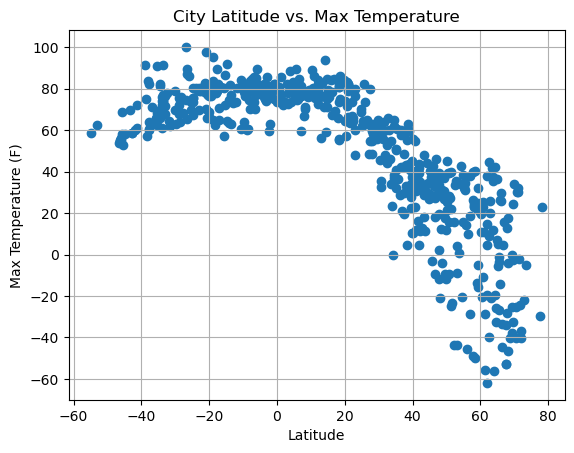

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

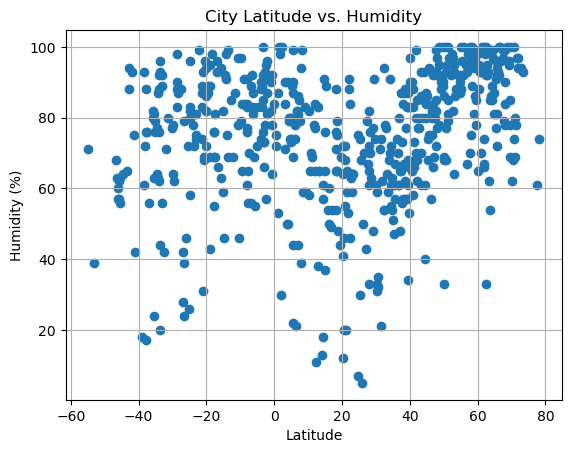

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

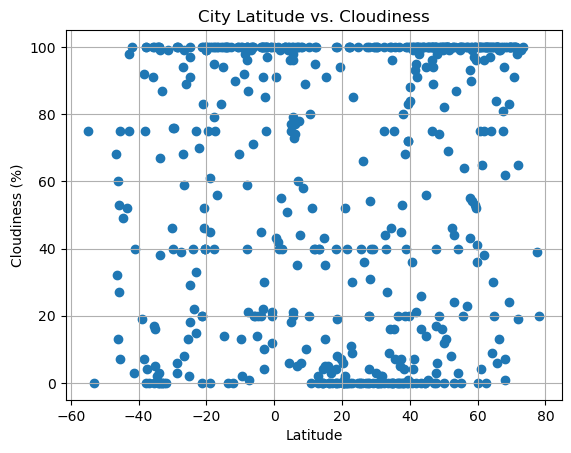

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

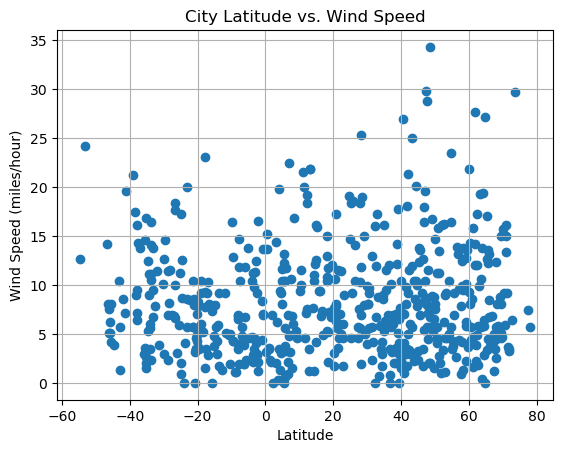

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#???

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-40.14,100,91,5.91,RU,1674330771
1,meulaboh,4.1363,96.1285,73.51,90,99,3.51,ID,1674330771
3,qaanaaq,77.4840,-69.3632,-29.90,61,39,7.47,GL,1674330772
4,halifax,44.6453,-63.5724,29.50,80,94,10.00,CA,1674330600
7,berlevag,70.8578,29.0864,30.20,74,100,16.11,NO,1674330773


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bambous virieux,-20.3428,57.7575,77.25,88,40,3.44,MU,1674330772
5,puerto ayora,-0.7393,-90.3518,82.36,92,21,7.00,EC,1674330773
6,uarini,-2.9900,-65.1083,85.46,66,30,4.52,BR,1674330773
10,bredasdorp,-34.5322,20.0403,67.21,77,2,5.26,ZA,1674330774
11,esperance,-33.8667,121.9000,61.18,76,3,16.42,AU,1674330775


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6998890793513669


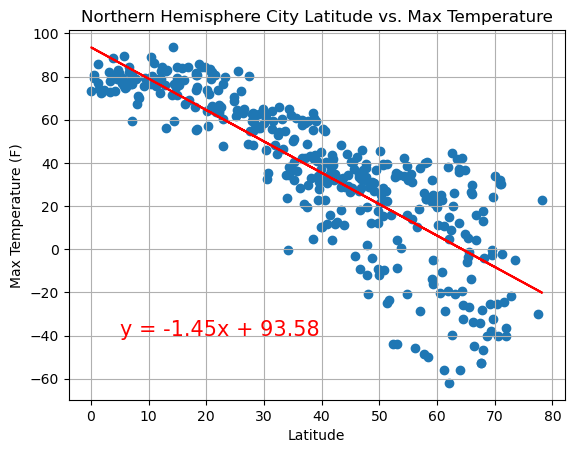

In [28]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression
nt_slope, nt_int, nt_r, nt_p, nt_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values_nt = northern_hemi_df["Lat"] * nt_slope + nt_int
# Create line eq
nt_fit = "y = " + str(round(nt_slope,2)) + "x + " + str(round(nt_int,2))

# Add regression line and equatin to graph
plt.plot(northern_hemi_df["Lat"], regress_values_nt, "r-")
plt.annotate(nt_fit,(5,-40),fontsize=15,color="red")

# Add r values printout
print(f"The r-squared is: {nt_r**2}")

The r-squared is: 0.20567652108923684


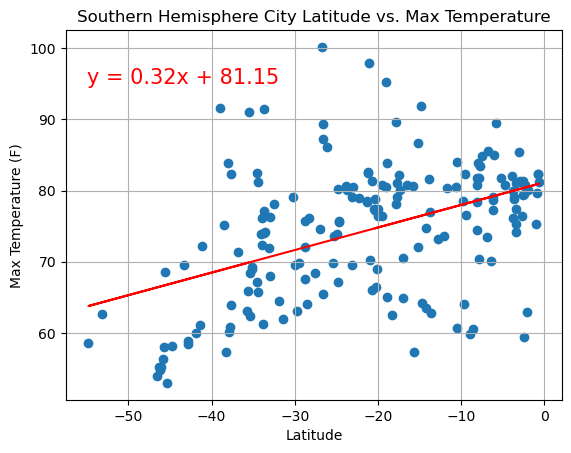

In [30]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression
st_slope, st_int, st_r, st_p, st_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values_st = southern_hemi_df["Lat"] * st_slope + st_int
# Create line eq
st_fit = "y = " + str(round(st_slope,2)) + "x + " + str(round(st_int,2))

# Add regression line and equatin to graph
plt.plot(southern_hemi_df["Lat"], regress_values_st, "r-")
plt.annotate(st_fit,(-55,95),fontsize=15,color="red")

# Add r values printout
print(f"The r-squared is: {st_r**2}")

**Discussion about the linear relationship:** The plots above display temperature data compared with latitude data for cities in the Northern (top chart) and Southern (bottom chart) hemispheres. In the Northern hemisphere, we can see the temperature decrease as we gain latitude (moving north away from the equator). In the Southern hemisphere, we see a similar phenomenon: temperature decreases as we move away (south in this case) from the equator. Both plots show that the highest temperatures are found at the equator. The temperature drops more rapidly as we deviate from the equator in the Northern hemisphere compared to the Southern hemisphere. The regression fits much more accurately in the Northern hemisphere than it does in the Southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1839555525599165


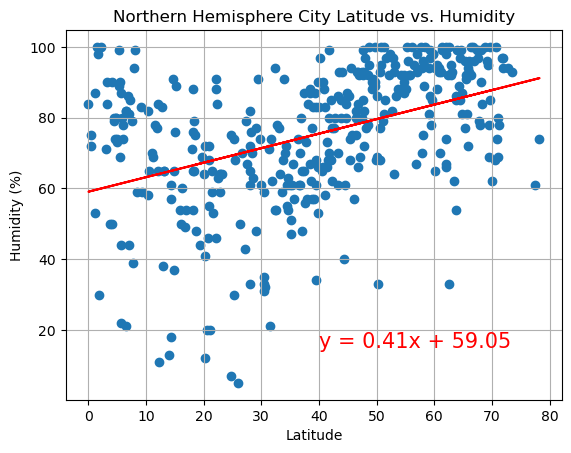

In [32]:
# Northern Hemisphere
# Build scatter plot for latitude vs. humidity
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values_nh = northern_hemi_df["Lat"] * nh_slope + nh_int
# Create line eq
nh_fit = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))

# Add regression line and equatin to graph
plt.plot(northern_hemi_df["Lat"], regress_values_nh, "r-")
plt.annotate(nh_fit,(40,15),fontsize=15,color="red")

# Add r values printout
print(f"The r-squared is: {nh_r**2}")

The r-squared is: 0.09058440357412555


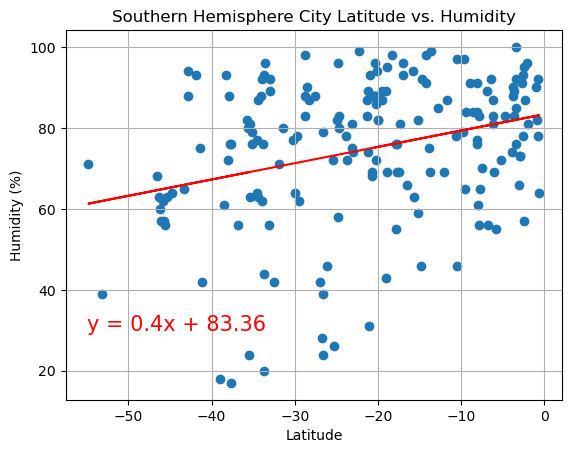

In [34]:
# Southern Hemisphere
# Build scatter plot for latitude vs. humidity
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values_sh = southern_hemi_df["Lat"] * sh_slope + sh_int
# Create line eq
sh_fit = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))

# Add regression line and equatin to graph
plt.plot(southern_hemi_df["Lat"], regress_values_sh, "r-")
plt.annotate(sh_fit,(-55,30),fontsize=15,color="red")

# Add r values printout
print(f"The r-squared is: {sh_r**2}")

**Discussion about the linear relationship:** The plots above display humidity data compared with latitude data for cities in the Northern (top chart) and Southern (bottom chart) hemispheres. In the Northern hemisphere, humidity increases marginally as latitude increases. In the Southern hemisphere, humidity decreases marginally as latitude decreases. These regressions do not have a good fit to the data, meaning these correlations are weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06884194513305249


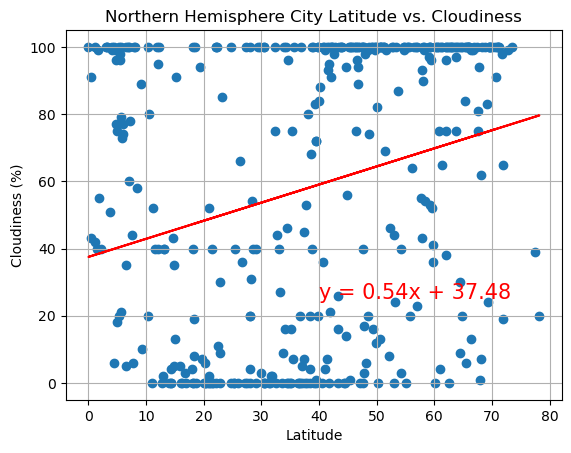

In [36]:
# Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression
nc_slope, nc_int, nc_r, nc_p, nc_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values_nc = northern_hemi_df["Lat"] * nc_slope + nc_int
# Create line eq
nc_fit = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_int,2))

# Add regression line and equatin to graph
plt.plot(northern_hemi_df["Lat"], regress_values_nc, "r-")
plt.annotate(nc_fit,(40,25),fontsize=15,color="red")

# Add r values printout
print(f"The r-squared is: {nc_r**2}")

The r-squared is: 0.055278356183527014


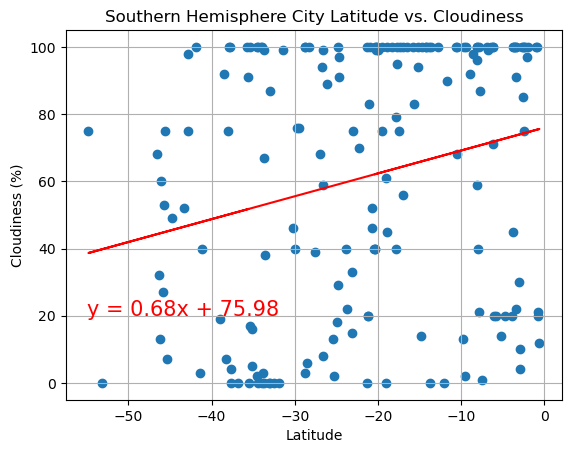

In [38]:
# Southern Hemisphere
# Build scatter plot for latitude vs. cloudiness
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression
sc_slope, sc_int, sc_r, sc_p, sc_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values_sc = southern_hemi_df["Lat"] * sc_slope + sc_int
# Create line eq
sc_fit = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_int,2))

# Add regression line and equatin to graph
plt.plot(southern_hemi_df["Lat"], regress_values_sc, "r-")
plt.annotate(sc_fit,(-55,20),fontsize=15,color="red")

# Add r values printout
print(f"The r-squared is: {sc_r**2}")

**Discussion about the linear relationship:** The plots above display cloudiness data compared with latitude data for cities in the Northern (top chart) and Southern (bottom chart) hemispheres. Both charts have extremely low r values, which signifies that there is no correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0011336315462071513


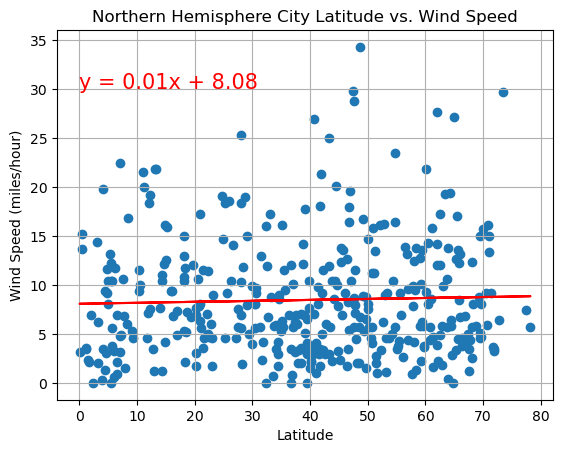

In [40]:
# Northern Hemisphere
# Build scatter plot for latitude vs. wind speed
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression
nw_slope, nw_int, nw_r, nw_p, nw_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values_nw = northern_hemi_df["Lat"] * nw_slope + nw_int
# Create line eq
nw_fit = "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_int,2))

# Add regression line and equatin to graph
plt.plot(northern_hemi_df["Lat"], regress_values_nw, "r-")
plt.annotate(nw_fit,(0,30),fontsize=15,color="red")

# Add r values printout
print(f"The r-squared is: {nw_r**2}")

The r-squared is: 0.06981637502277313


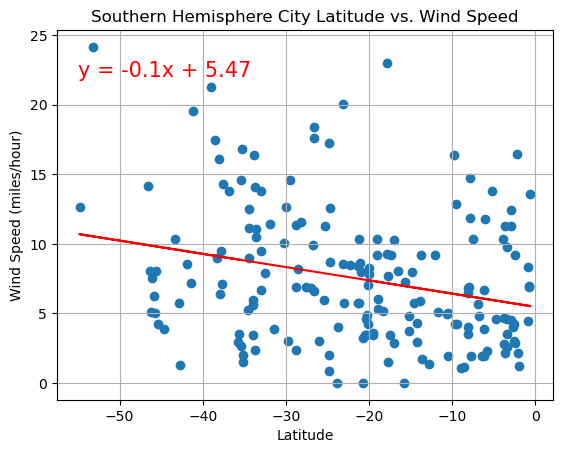

In [42]:
# Southern Hemisphere
# Build scatter plot for latitude vs. wind speed
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Perform linear regression
sw_slope, sw_int, sw_r, sw_p, sw_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values_sw = southern_hemi_df["Lat"] * sw_slope + sw_int
# Create line eq
sw_fit = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_int,2))

# Add regression line and equatin to graph
plt.plot(southern_hemi_df["Lat"], regress_values_sw, "r-")
plt.annotate(sw_fit,(-55,22),fontsize=15,color="red")

# Add r values printout
print(f"The r-squared is: {sw_r**2}")

**Discussion about the linear relationship:** The plots above display wind speed data compared with latitude data for cities in the Northern (top chart) and Southern (bottom chart) hemispheres. Both charts have extremely low r values, which signifies that there is little to no correlation between latitude and wind speed. 